<a href="https://colab.research.google.com/github/Marvel280904/DataMining---Marvel/blob/main/%5BQuestion%5D_Exercise_Week_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading Library

In [92]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.dates as mdates

!pip install mlxtend==0.23.1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **A Day in the Life of a Data Analyst: Unraveling Insights from The Bread Basket Dataset**

---

**Thursday, December 5, 2024** <br>
As the sun rises on another busy Thursday, I settle into my workspace, ready to dive into The Bread Basket dataset. This dataset is a treasure trove of information, capturing the essence of customer transactions at a local bakery. My goal today is to uncover insights that can help the bakery optimize its offerings and enhance customer satisfaction.


## **Loading Dataset**
I start my day by loading the dataset into my Python environment. Yesterday, I got the dataset from my [Client](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/bread%20basket.csv). Using Pandas, I import the data and take a moment to familiarize myself with its structure.

In [93]:
#1
# load the data set ans show the first five transaction
url = "https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/bread%20basket.csv"
df = pd.read_csv(url)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


As I glance through the initial rows, I see the columns: Transaction, Item, date_time, period_day, and weekday_weekend. Each transaction is unique, and I can already sense the potential insights hidden within.

## **Exploratory Data Analysis (EDA)**
With the dataset loaded, I transition into Exploratory Data Analysis (EDA). This phase is crucial for understanding the data better and identifying patterns.
### **Data Overview**
I begin by checking for missing values and summarizing the basic statistics of the dataset.

In [94]:
#2 info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [95]:
#3 check missing values
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Transaction,0
Item,0
date_time,0
period_day,0
weekday_weekend,0


4. The overview reveals a _________________________. (fill that blank on the section below)

1. Gambaran Dataset:
  - Jumlah Baris dan Kolom: Dataset memiliki 20,507 baris dan 5 kolom.
  - Kolom-kolom:
  
    a. Transaction: Kolom numerik (int64) yang menunjukkan ID transaksi.
    
    b. Item: Kolom string (object) yang mencatat nama barang yang dibeli.
    
    c. date_time: Kolom string (object) yang menunjukkan waktu pembelian dalam format "dd-mm-yyyy hh:mm".
    
    d. period_day: Kolom string (object) yang menunjukkan periode waktu transaksi seperti "morning", "afternoon", dll.
    
    e. weekday_weekend: Kolom string (object) yang mengindikasikan apakah transaksi terjadi pada hari kerja atau akhir pekan.
2. Pengecekan Nilai Kosong:
  - Tidak ada nilai kosong di semua kolom.
  - Setiap kolom memiliki jumlah data penuh sebesar 20,507 entri, sesuai dengan jumlah baris dataset.
3. Pemakaian Memori:
  - Dataset menghabiskan 801.2 KB memori.

Kesimpulan:
Dataset ini bersih (tidak ada missing value) dan siap digunakan untuk analisis lebih lanjut. Data mencakup informasi waktu, periode transaksi, dan jenis barang yang dibeli, sehingga memungkinkan analisis perilaku pelanggan berdasarkan waktu, hari, dan barang yang dibeli.

### **Transaction Trends**
Next, I analyze transaction trends over time. I extract the date and hour from the date_time column to see how customer purchases vary throughout the day and week. Then, I visualize the daily transaction trends to identify peak days and times for customer activity.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


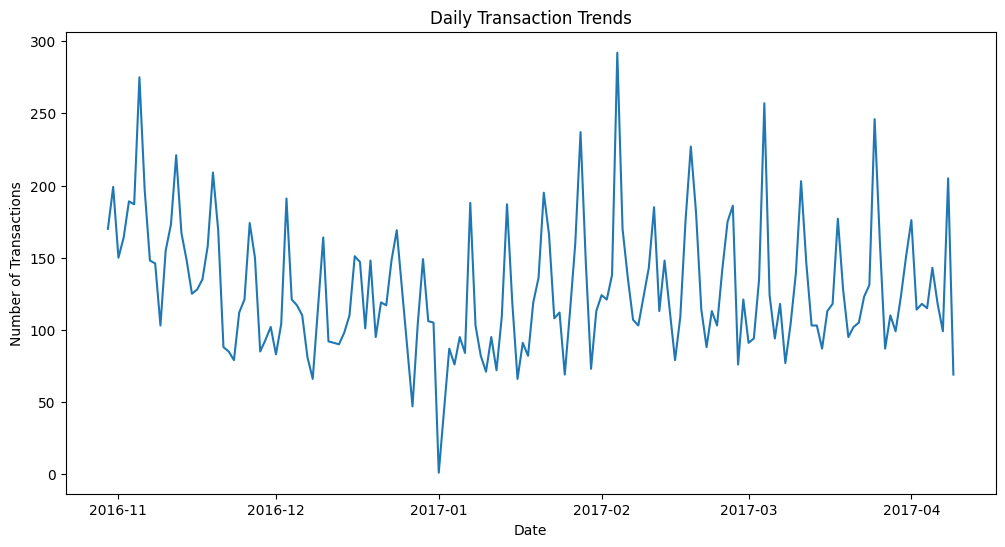

In [96]:
# 5
df['date_time'] = pd.to_datetime(df['date_time'], format="%d-%m-%Y %H:%M")

df['date'] = df['date_time'].dt.date
df['hour'] = df['date_time'].dt.hour

daily_transactions = df.groupby('date')['Transaction'].count()

plt.figure(figsize=(12, 6))
plt.plot(daily_transactions.index, daily_transactions.values)
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Daily Transaction Trends')
plt.show()


Oh my God, it's so difficult to get insights from this visualization, but it seems like there might be a trend to uncover. Let me try separating it by the perspective of hour, time, day, day_name, month, and year by adding each of those variabels into the dataframe.

In [97]:
# 6

df['day'] = df['date_time'].dt.day
df['month'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year
df['time'] = df['date_time'].dt.time
df['hour'] = df['date_time'].dt.hour
df['day_name'] = df['date_time'].dt.day_name()


ordered_columns = [
    "Transaction", "Item", "date_time", "period_day", "weekday_weekend",
    "day", "month", "year", "time", "hour", "day_name"
]
df_separate = pd.DataFrame(df[ordered_columns])

df_separate.sample(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Item,date_time,period_day,weekday_weekend,day,month,year,time,hour,day_name
10352,5174,Tea,2017-01-22 15:24:00,afternoon,weekend,22,1,2017,15:24:00,15,Sunday
17932,8516,Toast,2017-03-21 10:40:00,morning,weekday,21,3,2017,10:40:00,10,Tuesday
18057,8580,Bread,2017-03-22 12:21:00,afternoon,weekday,22,3,2017,12:21:00,12,Wednesday
10380,5187,Hot chocolate,2017-01-23 10:33:00,morning,weekday,23,1,2017,10:33:00,10,Monday
1753,854,Sandwich,2016-11-08 12:34:00,afternoon,weekday,8,11,2016,12:34:00,12,Tuesday



Alright, now I can easily create a visualization of monthly sales.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


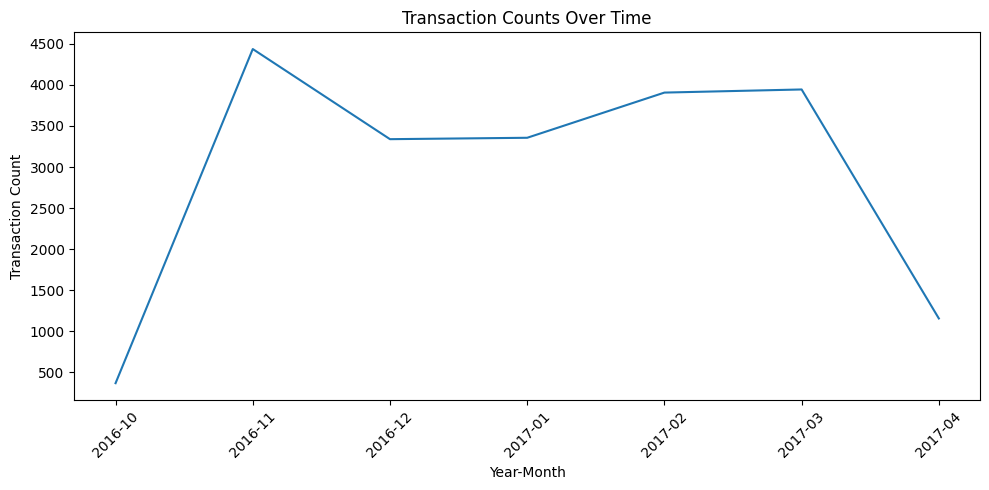

In [98]:
# 7

df_separate['Year-Month'] = df['date_time'].dt.to_period('M').astype(str)

monthly_data = df_separate.groupby('Year-Month').size().reset_index(name='Transaction Count')

plt.figure(figsize=(10, 5))
plt.plot(monthly_data['Year-Month'], monthly_data['Transaction Count'])
plt.title('Transaction Counts Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

8. Now, the visualization above provides better insights: _________________________. (fill that blank on the section below)

1. Visualisasi Tren Transaksi Harian:
 - Gambar pertama menunjukkan tren jumlah transaksi harian dari November 2016 hingga April 2017.
 - Polanya: Terdapat fluktuasi yang signifikan, dengan beberapa puncak transaksi yang terjadi secara berkala. Jumlah transaksi menurun di awal Januari 2017, yang mungkin disebabkan oleh musim liburan atau faktor musiman lainnya. Peningkatan terjadi di akhir bulan dan akhir pekan, terlihat dari puncak-puncak yang lebih tajam.
 - Penjelasan Insights: Dengan memisahkan data menjadi kolom yang lebih terstruktur, Anda bisa mendapatkan wawasan lebih baik, seperti Transaksi lebih tinggi di akhir pekan dibandingkan hari kerja, sebagaimana terlihat di beberapa puncak grafik.
 - Polarisasi waktu: Transaksi mungkin lebih sering terjadi pada jam-jam tertentu, yang bisa dieksplorasi lebih lanjut dengan kolom hour dan period_day.

2. Visualisasi monthly_sales
 - Sumbu X (Year-Month): Sumbu horizontal menampilkan periode waktu dalam format tahun-bulan, dimulai dari 2016-10 hingga 2017-04.
 - Sumbu Y (Transaction Count): Sumbu vertikal menunjukkan jumlah transaksi pada setiap bulan.
 - Interpretasi Visualisasi
    - Peningkatan Cepat di Awal: Jumlah transaksi mengalami peningkatan yang sangat pesat dari bulan Oktober 2016 (2016-10) hingga November 2016 (2016-11). Ini mungkin menunjukkan periode promosi, peluncuran produk baru, atau aktivitas yang meningkatkan transaksi.
    - Penurunan Stabil Setelah Puncak: Setelah mencapai puncak pada November 2016, jumlah transaksi menurun secara signifikan pada bulan Desember 2016 (2016-12) dan kemudian stabil di kisaran 3.000 transaksi per bulan dari Januari 2017 hingga Maret 2017 (2017-01 sampai 2017-03).
    - Penurunan Tajam di Akhir: Terdapat penurunan tajam pada bulan April 2017 (2017-04). Hal ini bisa disebabkan oleh perubahan pola konsumen, berakhirnya promosi, atau faktor musiman.
 - Potensi Analisis Lanjutan
    - Musiman (Seasonality): Tren menunjukkan pola yang mungkin terkait dengan musim, seperti peningkatan di akhir tahun (liburan) dan penurunan setelahnya.
    - Faktor Khusus pada November 2016: Analisis lebih lanjut diperlukan untuk memahami alasan peningkatan tajam pada bulan tersebut.
    - Penurunan di April 2017: Mengeksplorasi data lain (misalnya, kategori produk atau perilaku pelanggan) dapat memberikan wawasan tambahan tentang penyebab penurunan tajam.

Next, I want to see if there's a trend for each day of the week in each month.
Oh, the dataframe has a column called weekday_weekend. What days include weekends and weekdays??

In [99]:
#9
# Mengelompokkan nama hari berdasarkan weekday_weekend
weekday_names = df_separate[df_separate['weekday_weekend'] == 'weekday']['day_name'].unique()
weekend_names = df_separate[df_separate['weekday_weekend'] == 'weekend']['day_name'].unique()

# Menampilkan hasil
print("Unique weekday names:", weekday_names)
print("Unique weekend names:", weekend_names)

Unique weekday names: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
Unique weekend names: ['Sunday' 'Saturday']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Oh, okay, now I know that "weekend" refers to Sunday and Saturday. Alright, moving on, before creating the visualization, it seems necessary to create an aggregation with the columns for the month and day name, where the values represent the total transactions that occurred.

In [100]:
#10
monthly_day_transactions = df_separate.pivot_table(index='month', columns='day_name', values='Transaction', aggfunc='count', fill_value=0)
ordered_columns = [
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
]
monthly_day_transactions = monthly_day_transactions[ordered_columns]
monthly_day_transactions = monthly_day_transactions.astype(int)
monthly_day_transactions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
month,,,,,,,
1,329,474,322,399,489,807,536
2,474,429,419,456,599,879,650
3,379,433,459,557,674,883,559
4,118,115,143,118,99,381,183
10,199,0,0,0,0,0,170
11,469,599,576,591,639,879,683
12,356,342,402,525,624,776,314


11. Wow, it turns out the insight that can be gained from the table above is _____

1. Tren Berdasarkan Hari (Weekdays vs Weekends):
 - Weekdays (Monday-Friday): Secara konsisten, jumlah transaksi pada hari kerja (weekdays) cenderung lebih rendah dibandingkan akhir pekan (weekends), terutama pada bulan-bulan seperti November (11) dan Desember (12). Misalnya, di bulan November (11), jumlah transaksi tertinggi pada weekdays adalah 639 (Friday), jauh lebih rendah dibandingkan Saturday (879) atau Sunday (683).
 - Weekends (Saturday-Sunday): Transaksi pada akhir pekan selalu lebih tinggi dibandingkan hari kerja, menunjukkan bahwa pelanggan lebih aktif berbelanja pada akhir pekan.

2. Pola Berdasarkan Bulan:
 - Desember (12): Jumlah transaksi cenderung meningkat secara signifikan, baik pada weekdays maupun weekends. Ini mungkin disebabkan oleh musim liburan atau belanja akhir tahun. Saturday (776) dan Friday (624) adalah hari-hari dengan aktivitas tertinggi di bulan ini.
 - April (4): April menunjukkan penurunan drastis dalam jumlah transaksi, baik di weekdays maupun weekends, terutama jika dibandingkan dengan bulan-bulan sebelumnya. Penurunan ini mungkin mencerminkan faktor musiman, seperti berakhirnya musim liburan.
 - November (11): Terdapat aktivitas tinggi pada semua hari dalam seminggu. Ini bisa terkait dengan promosi besar seperti Black Friday atau persiapan belanja akhir tahun.

3. Anomali pada Oktober (10):
 - October (10): Data menunjukkan transaksi hanya terjadi pada Monday (199) dan Sunday (170), sementara hari lainnya kosong. Ini mungkin karena data yang tidak lengkap atau adanya peristiwa khusus yang menyebabkan aktivitas terbatas hanya pada hari tertentu.

4. Perbandingan Hari: Saturday adalah hari dengan jumlah transaksi tertinggi secara konsisten di hampir semua bulan, menunjukkan bahwa banyak pelanggan lebih memilih berbelanja di hari Sabtu. Monday sering memiliki transaksi terendah, yang menunjukkan aktivitas belanja cenderung lebih sedikit di awal minggu.
 - Wawasan Utama:
    - Akhir Pekan adalah Puncak Aktivitas: Fokus pada promosi atau diskon di akhir pekan bisa meningkatkan penjualan lebih jauh, terutama di hari Sabtu dan Minggu.
    - Peningkatan Musiman di Desember: Desember menunjukkan lonjakan transaksi yang signifikan. Ini adalah peluang untuk memanfaatkan momentum liburan dengan strategi pemasaran yang agresif.
    - Penurunan di April: Strategi perlu diperhatikan pada bulan-bulan dengan transaksi rendah seperti April untuk menjaga pendapatan tetap stabil.


It seems ready to create the visualization now. Okay, I will create a comparison visualization of total sales per day for each month.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


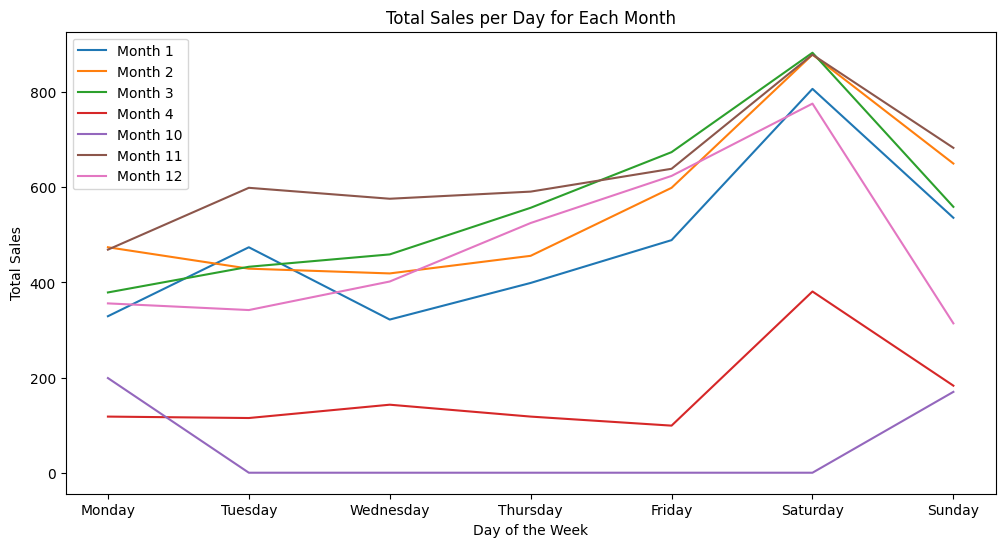

In [101]:
# 12
monthly_day_transactions_transposed = monthly_day_transactions.T
plt.figure(figsize=(12, 6))
for month in monthly_day_transactions_transposed.columns:
    plt.plot(monthly_day_transactions_transposed.index, monthly_day_transactions_transposed[month], label=f'Month {month}')

plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.title('Total Sales per Day for Each Month')
plt.legend()
plt.show()

13. Wow, after visualizing it like this, I can gain insights into the sales trends that ____.

1. Pola Kenaikan Penjualan pada Akhir Pekan: Secara umum, penjualan cenderung meningkat pada hari Jumat dan Sabtu. Hal ini terlihat pada semua bulan, terutama untuk bulan ke-3, 10, dan 12, yang memiliki puncak penjualan di akhir pekan. Setelah mencapai puncaknya pada Sabtu, penjualan biasanya menurun tajam pada hari Minggu.

2. Penjualan yang Stabil: Bulan ke-4 (warna merah) menunjukkan pola penjualan yang lebih stabil sepanjang minggu dibandingkan dengan bulan lainnya, dengan hanya sedikit fluktuasi dari Senin hingga Minggu.

3. Penurunan Penjualan pada Awal Minggu: Bulan ke-1, 10, dan 11 memperlihatkan penurunan penjualan yang signifikan pada hari Senin dibandingkan dengan akhir pekan sebelumnya.

4. Kinerja Bulan Secara Keseluruhan:
 - Bulan ke-3 (warna hijau) memiliki penjualan yang konsisten tinggi dibandingkan dengan bulan lainnya, terutama pada akhir pekan.
 - Bulan ke-11 (warna ungu) memiliki tingkat penjualan yang paling rendah secara konsisten selama minggu tersebut, dengan pengecualian pada Sabtu.

5. Perbandingan Antar Bulan: Penjualan bulan ke-12 cukup stabil di tengah minggu (Selasa hingga Jumat), sebelum melonjak tajam pada hari Sabtu. Sementara itu, bulan ke-1 menunjukkan peningkatan secara bertahap dari awal minggu hingga akhir minggu.

Kesimpulan:
 - Untuk strategi bisnis, sebaiknya fokus pada peningkatan stok, promosi, atau aktivitas pemasaran pada Jumat dan Sabtu, karena hari-hari ini memiliki potensi penjualan tertinggi.
 - Sebaliknya, strategi untuk meningkatkan penjualan pada awal minggu perlu dilakukan, khususnya pada hari Senin yang cenderung lebih rendah dibandingkan hari lainnya.

Oh, it turns out there's also a "period_day" column in the dataframe, but at the beginning, I only noticed "morning." Hmm, I'm curious, what other unique values could there be?

In [102]:
# 14
days_name = df_separate['period_day'].unique()
days_name

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['morning', 'afternoon', 'evening', 'night'], dtype=object)

Oh, okay, there are "morning," "afternoon," "evening," and "night."
But, but, but, what are the time ranges for morning, afternoon, evening, and night? Let me try to find out.

In [103]:
# 15
# Mengelompokkan berdasarkan period_day dan mendapatkan nilai unik untuk hour
hour_ranges = df_separate.groupby('period_day')['hour'].unique()

# Menampilkan hasil
print("Unique morning_hour:", hour_ranges.get('morning', []))
print("Unique afternoon_hour:", hour_ranges.get('afternoon', []))
print("Unique evening_hour:", hour_ranges.get('evening', []))
print("Unique night_hour:", hour_ranges.get('night', []))

Unique morning_hour: [ 9 10 11  8  7  1]
Unique afternoon_hour: [12 13 14 15 16]
Unique evening_hour: [17 18 19 20]
Unique night_hour: [21 23 22]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


16. Hah, I found something odd in the results above. Did you notice it too? What do you think is odd about it and why?

1. Kenapa ini aneh?
 - Jam 1 pagi biasanya dikategorikan sebagai bagian dari periode "malam" daripada "pagi". Dalam konteks periode waktu:

 - Pagi umumnya dianggap mulai dari jam 6 pagi hingga 11 pagi.
 - Malam mencakup jam 11 malam hingga 5 pagi, dengan jam 1 pagi jelas jatuh dalam rentang waktu ini.
 - Dengan demikian, keberadaan jam 1 pagi dalam daftar morning_hour tampaknya merupakan masalah inkonsistensi data atau kesalahan dalam kategorisasi.

2. Apa yang mungkin menyebabkan ini?

Masalah ini bisa disebabkan oleh bagaimana nilai period_day ditetapkan dalam data. Ada kemungkinan bahwa untuk beberapa catatan, period_day secara tidak sengaja diberi label "pagi" padahal seharusnya diberi label "malam". Hal ini dapat terjadi jika kategori waktu tidak ditetapkan dengan benar saat memproses data.


But that's okay, I'll just continue exploring the insights. It seems like I can create a sales analysis based on the hours of each day here.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


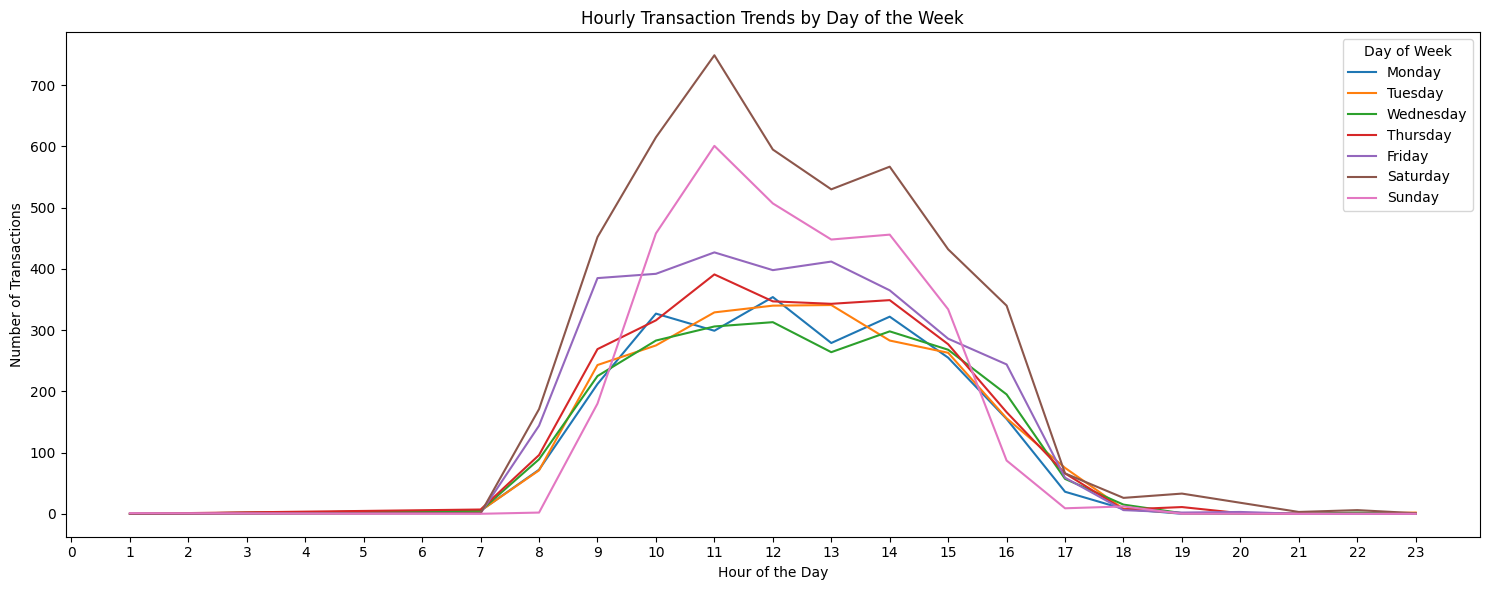

In [104]:
# 17
#Group by day and hour, then count transactions
daily_hourly_sales = df_separate.groupby(['day_name', 'hour'])['Transaction'].count().reset_index()

# Pivot the table for plotting
daily_hourly_sales = daily_hourly_sales.pivot(index='hour', columns='day_name', values='Transaction').fillna(0)

# Ensure days are in the desired order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_hourly_sales = daily_hourly_sales[days_order]

# Create the line chart
daily_hourly_sales.plot(kind='line', figsize=(15, 6))
plt.title('Hourly Transaction Trends by Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(24))  # Set x-axis ticks for each hour
plt.legend(title='Day of Week')
plt.tight_layout()
plt.show()

18. The daily sales trend plot reveals that _______

1. Penjelasan Visualisasi:
 - Sumbu X (Hour of the Day): Menunjukkan jam dalam sehari, dari pukul 00:00 hingga 23:00.
 - Sumbu Y (Number of Transactions): Menunjukkan jumlah transaksi yang terjadi pada setiap jam.
 - Garis Berbeda: Mewakili hari-hari dalam seminggu (Senin hingga Minggu), dengan warna yang berbeda untuk masing-masing hari.
 - Insight dari Grafik:
    - Puncak Transaksi: Secara umum, puncak transaksi terjadi antara pukul 10:00 hingga 14:00 untuk hampir semua hari dalam seminggu. Hari Sabtu (Saturday) dan Minggu (Sunday) cenderung memiliki puncak transaksi yang lebih tinggi dibandingkan dengan hari kerja. Transaksi menurun secara signifikan setelah pukul 15:00.
    - Hari dengan Volume Tertinggi: Sabtu (Saturday) menunjukkan puncak transaksi tertinggi, terutama antara pukul 11:00 hingga 13:00. Minggu (Sunday) juga memiliki volume transaksi yang tinggi, meskipun sedikit lebih rendah dibandingkan Sabtu.
    - Volume Lebih Rendah di Pagi dan Malam Hari: Transaksi sangat rendah dari pukul 00:00 hingga 07:00, yang kemungkinan besar adalah waktu non-operasional atau waktu sepi. Setelah pukul 18:00, jumlah transaksi kembali turun secara drastis.

Kesimpulan:
Sabtu dan Minggu merupakan hari dengan volume penjualan tertinggi, sehingga strategi promosi dan staf tambahan dapat difokuskan pada hari-hari tersebut.
Waktu dengan jumlah transaksi tertinggi adalah pukul 10:00 hingga 14:00, yang menunjukkan waktu optimal untuk fokus pada layanan pelanggan, restocking, dan operasional lainnya. Pada malam hari setelah pukul 18:00, aktivitas transaksi menurun, sehingga dapat menjadi waktu yang baik untuk melakukan tugas-tugas seperti inventaris atau penutupan toko.

### **Item Popularity**
Curious about which items are most popular, I analyze the frequency of orders for each item.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


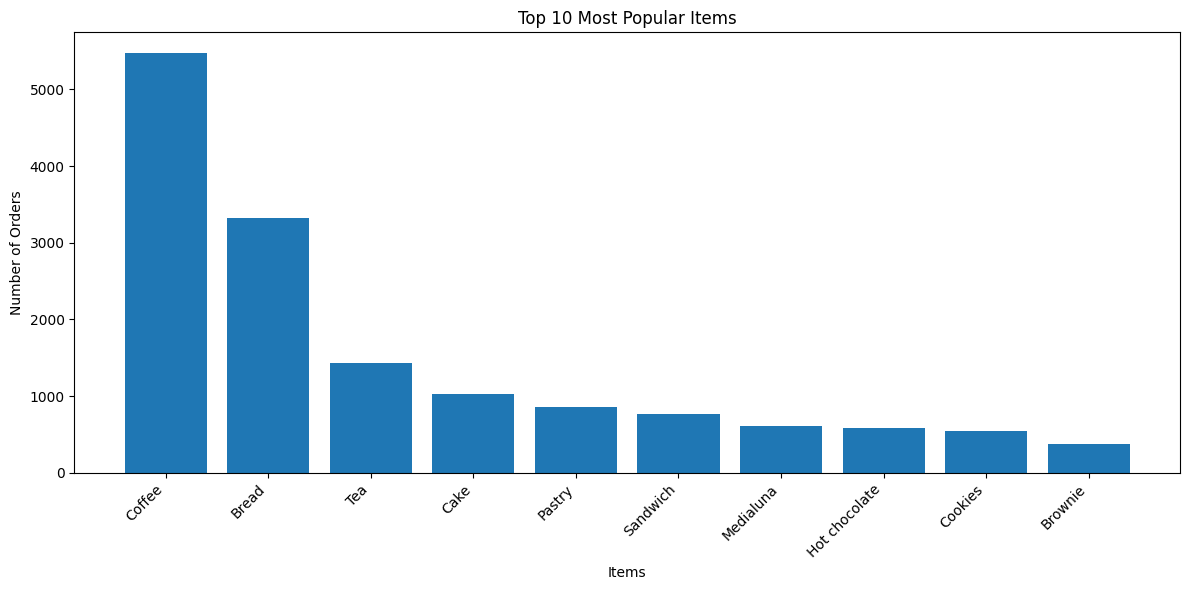

In [105]:
# 19
# Group by item and count occurrences
item_frequency = df_separate.groupby('Item')['Transaction'].count().reset_index()

# Rename the 'Transaction' column to 'Frequency'
item_frequency = item_frequency.rename(columns={'Transaction': 'Frequency'})

# Sort by frequency in descending order
item_frequency = item_frequency.sort_values(by=['Frequency'], ascending=False)

# Create a bar plot for the top 10 items
plt.figure(figsize=(12, 6))
plt.bar(item_frequency['Item'].head(10), item_frequency['Frequency'].head(10))
plt.xlabel('Items')
plt.ylabel('Number of Orders')
plt.title('Top 10 Most Popular Items')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Hmm, but this is overall data. I want to create a visualization by period instead, maybe the highest sales vary by period.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-106-05cea62d9926>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('coolwarm', len(item_frequency.head(10))) # Get a colormap


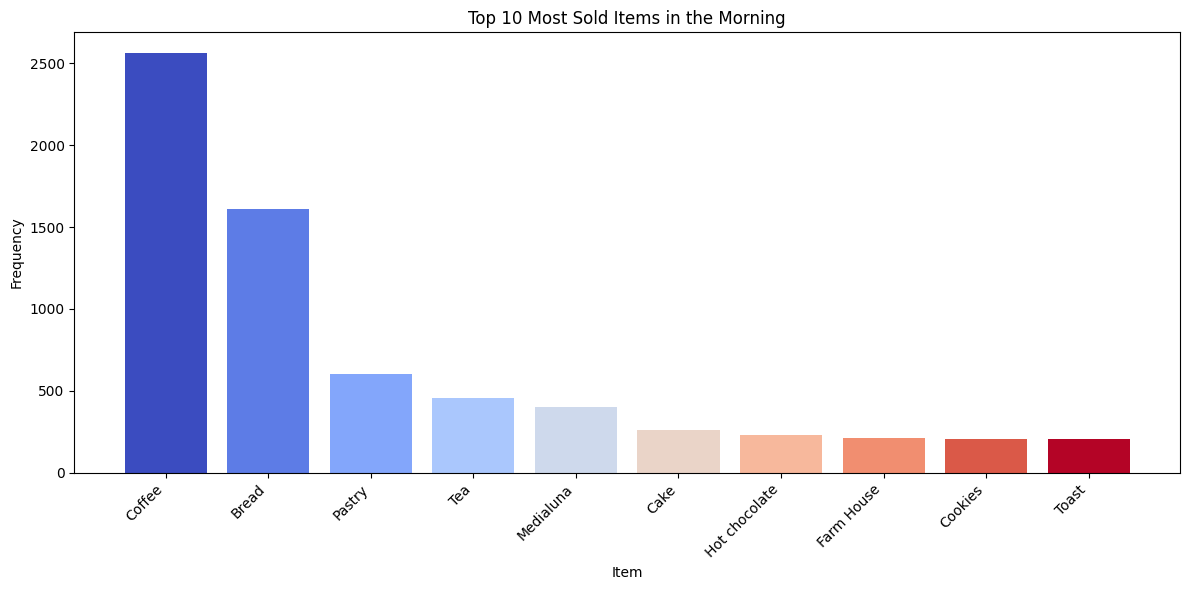

<ipython-input-106-05cea62d9926>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('coolwarm', len(item_frequency.head(10))) # Get a colormap


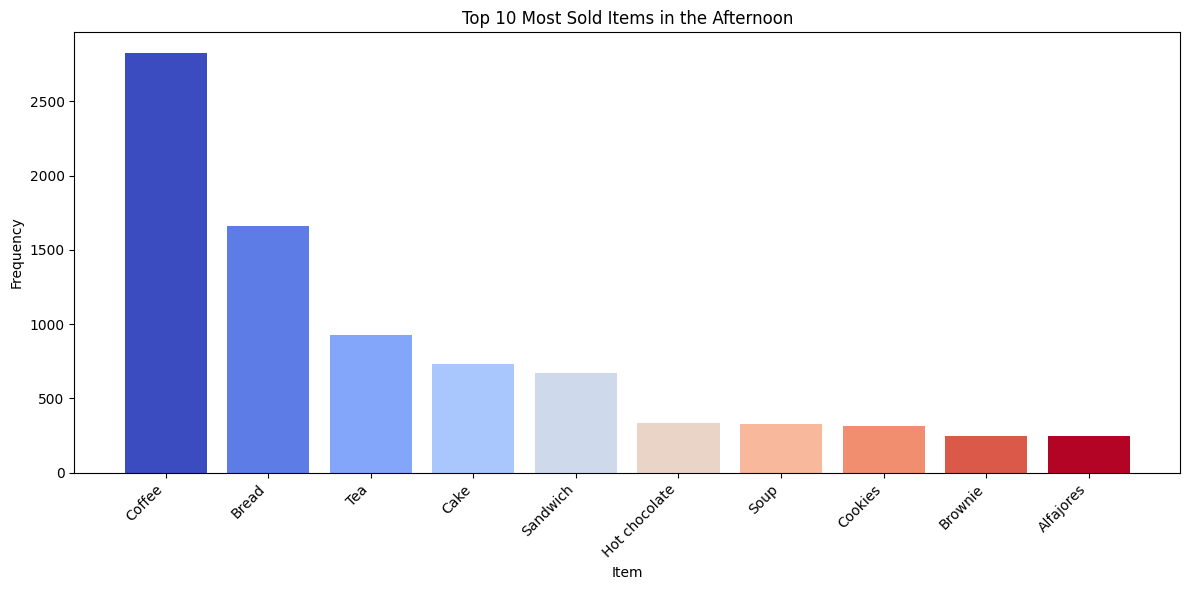

<ipython-input-106-05cea62d9926>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('coolwarm', len(item_frequency.head(10))) # Get a colormap


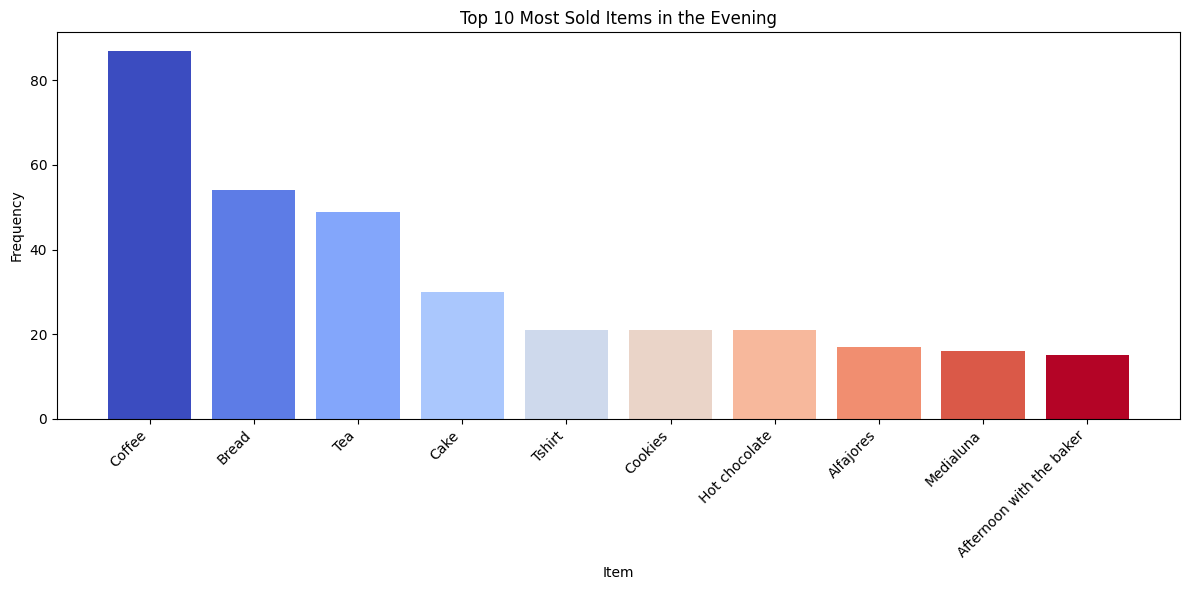

<ipython-input-106-05cea62d9926>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('coolwarm', len(item_frequency.head(10))) # Get a colormap


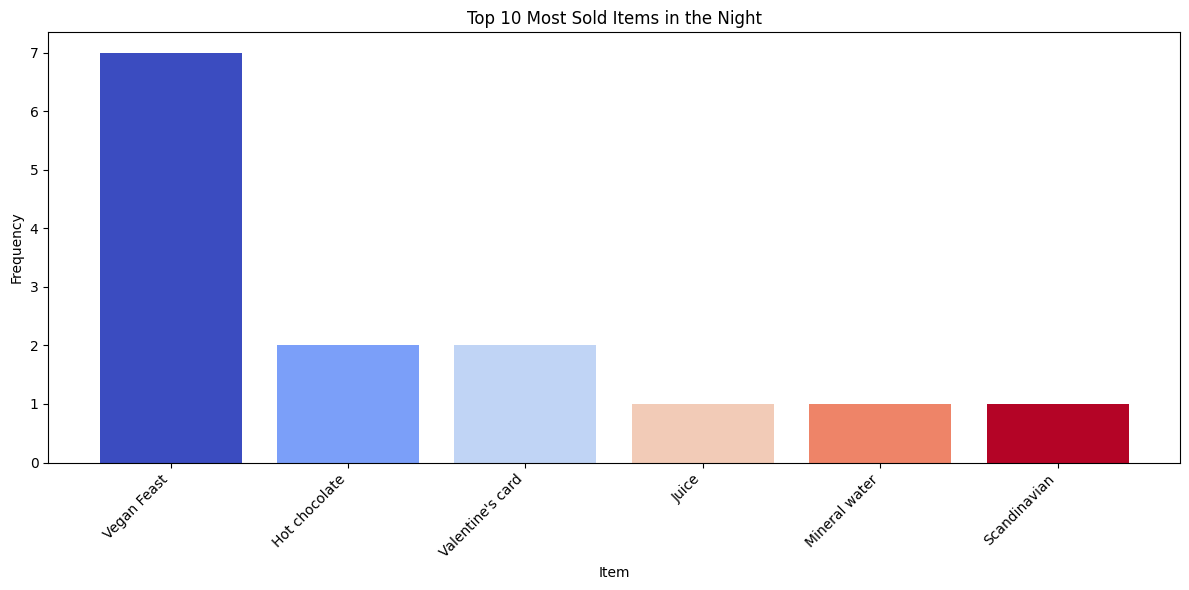

In [106]:
# 20
import matplotlib.cm as cm

def plot_top_items_by_period(period):
    # Filter data for the specified period
    period_data = df[df['period_day'] == period]

    # Group by item and count occurrences for the period
    item_frequency = period_data.groupby('Item')['Transaction'].count().reset_index()
    item_frequency = item_frequency.rename(columns={'Transaction': 'Frequency'})
    item_frequency = item_frequency.sort_values(by=['Frequency'], ascending=False)

    # Create a bar plot for the top 10 items in the period
    plt.figure(figsize=(12, 6)) # Fixed indentation here
    colors = cm.get_cmap('coolwarm', len(item_frequency.head(10))) # Get a colormap
    plt.bar(item_frequency['Item'].head(10), item_frequency['Frequency'].head(10),
            color=[colors(i) for i in range(len(item_frequency.head(10)))])
    plt.xlabel('Item')
    plt.ylabel('Frequency')
    plt.title(f'Top 10 Most Sold Items in the {period.capitalize()}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot for each period
for period in df['period_day'].unique():
    plot_top_items_by_period(period)

21. It turns out that there is something different in the plot above, the insight is ____


1. Menggabungkan wawasan ini dengan data dari waktu-waktu sebelumnya dalam sehari:

 - Pagi: Kopi mendominasi, diikuti oleh sarapan ringan seperti roti, pastry, dan teh, yang memenuhi kebutuhan pelanggan akan kenyamanan dan efisiensi.
 - Siang: Kopi tetap populer, namun mulai diimbangi oleh camilan dan hidangan ringan seperti teh, kue, dan sandwich, mencerminkan pergeseran preferensi ke hidangan yang lebih berat dan fleksibel.
 - Sore: Kopi masih menjadi pilihan utama, dilengkapi dengan camilan yang memanjakan seperti hot chocolate dan cookies, menunjukkan preferensi untuk bersantai dan mendapatkan kepuasan di akhir hari.
 - Berdasarkan tren ini, bisnis dapat menyesuaikan penawaran mereka secara efektif:
    - Pagi: Sediakan paket sarapan seperti kombinasi kopi, roti, dan pastry untuk menarik pelanggan pagi.
    - Siang: Perkenalkan paket makanan ringan dengan sandwich, teh, dan camilan untuk memenuhi kebutuhan makan siang yang lebih santai.
    - Sore: Tawarkan pilihan camilan santai seperti hot chocolate dan cookies untuk waktu bersantai di sore hari.
    - Malam: Soroti menu spesial malam seperti Vegan Feast untuk menangkap permintaan unik di jam malam.

Strategi berbasis waktu seperti ini dapat memaksimalkan kepuasan pelanggan dan meningkatkan penjualan sepanjang hari.

I found a valentine card, I was curious about when people bought it so I made a visualization of it

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


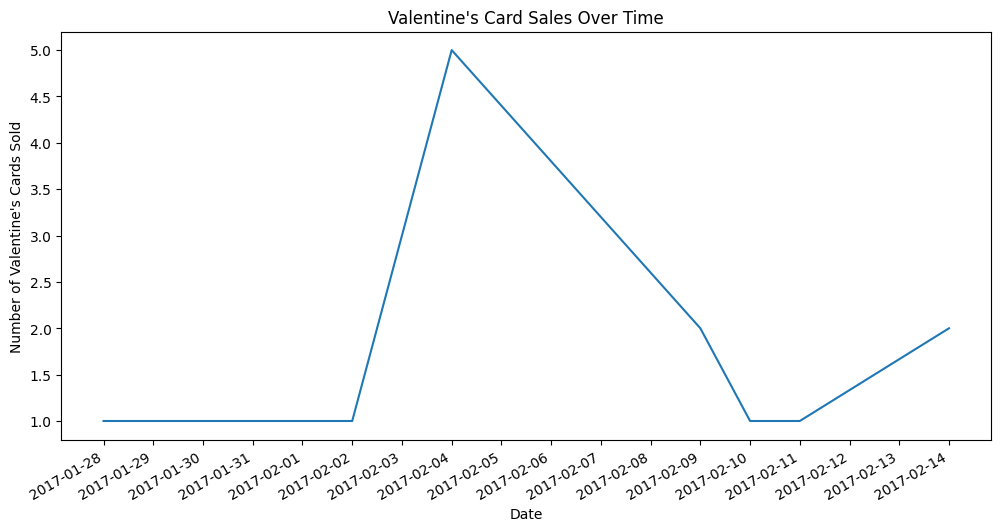

In [107]:
#22
# Filter transactions containing "Valentine's card"
valentines_card_transactions = df[df['Item'] == "Valentine's card"]

# Group by date and count transactions
valentines_sales_by_date = valentines_card_transactions.groupby('date')['Transaction'].count()


# Plot daily transaction trends for Valentine's card
plt.figure(figsize=(12, 6))
plt.plot(valentines_sales_by_date.index, valentines_sales_by_date.values)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1)) # Adjust interval as needed
plt.gcf().autofmt_xdate()

plt.xlabel('Date')
plt.ylabel('Number of Valentine\'s Cards Sold')
plt.title("Valentine's Card Sales Over Time")
plt.show()

23. I found the insight from the sale of the Valentine's cards above is ____


Dari grafik penjualan **Valentine Card**, terlihat bahwa penjualan meningkat tajam di awal Februari, dengan puncaknya terjadi sekitar tanggal **4-5 Februari**, menunjukkan bahwa banyak orang mulai membeli kartu beberapa hari sebelum Hari Valentine. Setelah puncak ini, penjualan menurun drastis karena sebagian besar orang telah melakukan pembelian. Namun, mendekati tanggal **14 Februari** (Hari Valentine), terdapat sedikit peningkatan penjualan, kemungkinan berasal dari pembeli yang berbelanja di saat-saat terakhir. Pola ini mencerminkan tren khas pada produk musiman, di mana permintaan meningkat menjelang acara, mencapai puncaknya sekitar **10 hari sebelum Hari Valentine**, lalu perlahan menurun setelahnya.

## **Applying the Apriori Algorithm**
With a solid understanding of the data, I shift my focus to identifying associations between items using the Apriori algorithm.

### **Data Preparation for Apriori**
I need to transform the dataset into a format suitable for the Apriori algorithm, where each transaction is represented as a row and each item as a column.

In [108]:
# 24
# Group data by 'Transaction' and 'Item' and sum quantities
df_separate['Quantity'] = df_separate.groupby(['Transaction', 'Item'])['Item'].transform('count')

# Drop duplicate rows to keep only one entry for each item per transaction
data = df_separate.drop_duplicates(subset=['Transaction', 'Item'])

# Create a pivot table to represent transactions
transaction_data = df_separate.pivot_table(index='Transaction', columns='Item', values='Quantity', aggfunc='sum').fillna(0)

# Display the first few rows of the transaction data
display(transaction_data.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
#25
# Convert quantities to 1 and 0
transaction_data = transaction_data.applymap(lambda x: 1 if x > 0 else 0)

# Display the first few rows of the transaction data
display(transaction_data.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-109-85c49d3072ca>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  transaction_data = transaction_data.applymap(lambda x: 1 if x > 0 else 0)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Finding Frequent Itemsets**
Now, I apply the Apriori algorithm to find frequent itemsets with a minimum support threshold. This will help identify combinations of items that are frequently purchased together. (min_support=0.02, metric="lift", min_threshold=1)

In [110]:
# 26
from mlxtend.frequent_patterns import apriori, association_rules
# Apply Apriori algorithm
frequent_itemsets = apriori(transaction_data, min_support=0.02, use_colnames=True)
frequent_itemsets_df = frequent_itemsets[['support', 'itemsets']]

display(frequent_itemsets_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  branches.append(branch)


,support,itemsets
0,0.036344,(Alfajores)
1,0.327205,(Bread)
2,0.040042,(Brownie)
3,0.103856,(Cake)
4,0.478394,(Coffee)
5,0.054411,(Cookies)
6,0.039197,(Farm House)
7,0.058320,(Hot chocolate)
8,0.038563,(Juice)
9,0.061807,(Medialuna)


In [111]:
# 27
from mlxtend.frequent_patterns import apriori, association_rules
# Apply Apriori algorithm
frequent_itemsets = apriori(transaction_data, min_support=0.02, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1, num_itemsets=frequent_itemsets.shape[0]) # Added num_itemsets

# Display the association rules
display(rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  branches.append(branch)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Bread),(Pastry),0.327205,0.086107,0.029160,0.089119,1.034977,1.0,0.000985,1.003306,0.050231,0.075908,0.003296,0.213884
1,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,1.0,0.000985,1.017305,0.036980,0.075908,0.017011,0.213884
2,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,1.0,0.005044,1.102664,0.102840,0.103745,0.093105,0.320679
3,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,1.0,0.005044,1.011905,0.176684,0.103745,0.011765,0.320679
4,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,1.0,0.008959,1.111865,0.420538,0.106736,0.100611,0.197779
5,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,1.0,0.008959,1.075372,0.439556,0.106736,0.070090,0.197779
6,(Coffee),(Cookies),0.478394,0.054411,0.028209,0.058966,1.083723,1.0,0.002179,1.004841,0.148110,0.055905,0.004818,0.288707
7,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,1.0,0.002179,1.083174,0.081700,0.055905,0.076787,0.288707
8,(Coffee),(Hot chocolate),0.478394,0.058320,0.029583,0.061837,1.060311,1.0,0.001683,1.003749,0.109048,0.058333,0.003735,0.284542
9,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,1.0,0.001683,1.058553,0.060403,0.058333,0.055314,0.284542


## Conclusion: The Impact of Data Analysis
28. As my day of analysis comes to a close, I compile my findings into a comprehensive report that highlights several key insights derived from The Bread Basket dataset:



1. Tren Transaksi:
Pola transaksi harian menunjukkan bahwa toko roti mencapai penjualan tertinggi pada akhir pekan (Sabtu dan Minggu), sejalan dengan waktu luang pelanggan yang lebih banyak untuk menikmati roti sebagai bagian dari rutinitas akhir pekan mereka. Jam tersibuk toko roti adalah antara pukul 10 pagi hingga 12 siang, mengindikasikan bahwa banyak pelanggan datang untuk camilan menjelang siang, makan siang ringan, atau membeli roti untuk kebutuhan makan mereka. Penjualan biasanya meningkat menjelang akhir tahun, kemungkinan besar karena musim liburan dan perayaan terkait.

2. Popularitas Produk:
Produk yang paling sering dibeli adalah Kopi, Roti, dan Teh, yang mencerminkan penawaran utama toko roti dan preferensi pelanggan terhadap kebutuhan pokok ini. Produk-produk ini tetap populer di berbagai waktu dalam sehari (pagi, siang, sore, dan malam), menunjukkan bahwa permintaan untuk produk tersebut tidak terlalu terpengaruh oleh waktu. Namun, penjualan Cookies, Hot Chocolate, dan Cake cenderung lebih tinggi di siang atau sore hari, menunjukkan bahwa produk ini lebih disukai sebagai camilan sore. Valentine's Card mengalami puncak penjualan pada bulan Februari, terutama sekitar tanggal 14 Februari, sesuai dengan pola produk musiman.

3. Asosiasi Produk (Algoritma Apriori):
Algoritma Apriori mengungkapkan asosiasi produk yang sering terjadi, seperti Kopi dan Toast, yang sering dibeli bersamaan karena nilai lift yang tinggi. Kombinasi lainnya termasuk Kopi dengan Medialuna, Pastry, dan Cake, yang membuka peluang untuk membuat penawaran atau promosi bundel yang mendorong pembelian produk-produk ini secara bersamaan.

4. Rekomendasi:

  Berdasarkan wawasan di atas, toko roti dapat mempertimbangkan strategi berikut:

    - Staf dan Inventaris:
Sesuaikan jumlah staf dan kelola inventaris dengan efektif untuk mengatasi permintaan yang lebih tinggi selama waktu sibuk (pukul 10 pagi hingga 12 siang) dan di akhir pekan.

    - Strategi Promosi:
Buat penawaran bundel atau diskon untuk kombinasi populer seperti Kopi dan Toast untuk mendorong pembelian produk ini secara bersamaan.

    - Fokus Produk:
Fokus pada produk inti toko roti, termasuk Kopi, Roti, Teh, dan Pastry, dengan memastikan pasokan selalu cukup untuk memenuhi permintaan yang konsisten.

    - Musim dan Acara Khusus:
Manfaatkan momen spesial seperti Hari Valentine dengan pemasaran yang ditargetkan dan penawaran produk khusus untuk meningkatkan penjualan.

    - Camilan Sore:
Promosikan produk seperti Cookies, Cake, dan Hot Chocolate di siang atau sore hari untuk menarik pelanggan yang mencari camilan atau kudapan sore.

Dengan memanfaatkan wawasan dan rekomendasi berbasis data ini, toko roti dapat mengoptimalkan operasional, meningkatkan penawaran produk, dan meningkatkan kepuasan pelanggan.